In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [18]:
data = pd.read_csv('Data/user_courses_review_test_set.csv')
data.head(3)

,course_name,lecture_name,review_rating,review_comment
0,Advanced Microsoft Excel,F1 to F12 - Using Excel's Function Keys,5,perfect
1,Agile and Scrum Project Management,Agile vs Waterfall - Conclusions,1,The SCRUM chapter are full of errors
2,AI Applications for Business Success,Correlation vs. Causation,3,Bad quality of audio and narrative


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   course_name     154 non-null    object
 1   lecture_name    154 non-null    object
 2   review_rating   154 non-null    int64 
 3   review_comment  150 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.9+ KB


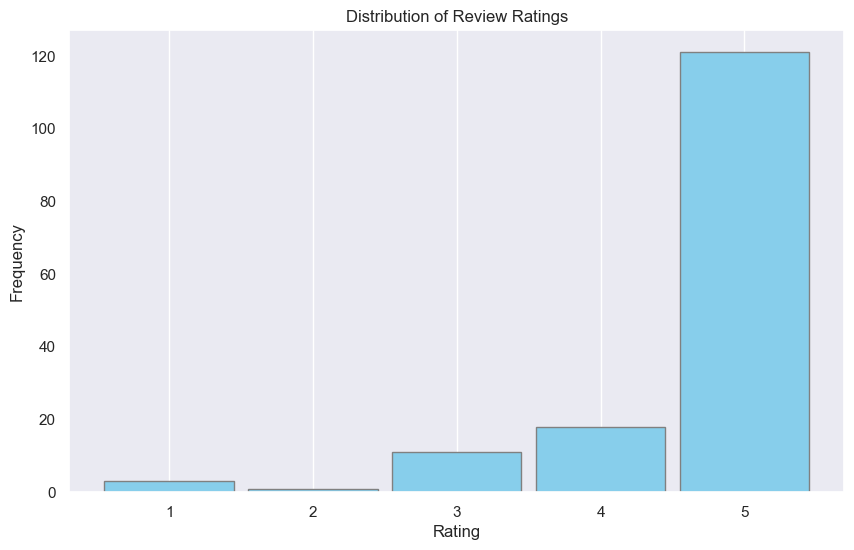

count    154.000000
mean       4.642857
std        0.805849
min        1.000000
25%        5.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: review_rating, dtype: float64

In [22]:
# Summary statistics for 'review_rating'
review_rating_stats = data['review_rating'].describe()

# Distribution of 'review_rating'
plt.figure(figsize=(10, 6))
plt.hist(data['review_rating'].dropna(), bins=range(1, 7), align='left', rwidth=0.9, color='skyblue', edgecolor='gray')
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))
plt.grid(axis='y')
plt.show()

review_rating_stats

In [32]:
clean_data = data.dropna()
new_shape = clean_data.shape
clean_data['comment_length'] = clean_data['review_comment'].apply(len)

correlation =clean_data[['comment_length', 'review_rating']].corr()

new_shape, correlation

((150, 4),
                 comment_length  review_rating
 comment_length        1.000000      -0.145662
 review_rating        -0.145662       1.000000)

* This correlation is plausible, negative in the sense that as the rating gets lower the customers tend to leave a lenghty review concering their issue

In [171]:
import re

# Define regex patterns to look for emphasis and sentiment
patterns = {
    "positive_emphasis": re.compile(r'\b(great|good|excellent|amazing|love|best|awesome|fantastic|brilliant|clear|nice)\b', re.IGNORECASE),
    "negative_emphasis": re.compile(r'\b(bad|terrible|awful|poor|worst|hate|disappoint)\b', re.IGNORECASE),
    "question": re.compile(r'\?'),
    "exclamation": re.compile(r'!'),
    "capital_words": re.compile(r'\b[A-Z]{2,}\b'),  # words with all letters capitalized, and at least two characters long
    "performance": re.compile(r'\b(unclear|boring|basic|fast|average)\b', re.IGNORECASE)
    
}

# Initialize a dictionary to hold the counts of each pattern
pattern_counts = {key: 0 for key in patterns}
print(pattern_counts)
print(patterns.items())
# Scan each review and count the occurrences of each pattern
for review in clean_data['review_comment']:
    for key, pattern in patterns.items():
        if re.search(pattern, review):
            pattern_counts[key] += 1

pattern_counts

{'positive_emphasis': 0, 'negative_emphasis': 0, 'question': 0, 'exclamation': 0, 'capital_words': 0, 'performance': 0}
dict_items([('positive_emphasis', re.compile('\\b(great|good|excellent|amazing|love|best|awesome|fantastic|brilliant|clear|nice)\\b', re.IGNORECASE)), ('negative_emphasis', re.compile('\\b(bad|terrible|awful|poor|worst|hate|disappoint)\\b', re.IGNORECASE)), ('question', re.compile('\\?')), ('exclamation', re.compile('!')), ('capital_words', re.compile('\\b[A-Z]{2,}\\b')), ('performance', re.compile('\\b(unclear|boring|basic|fast|average)\\b', re.IGNORECASE))])


{'positive_emphasis': 91,
 'negative_emphasis': 1,
 'question': 0,
 'exclamation': 0,
 'capital_words': 0,
 'performance': 6}

str

In [173]:
course_names = clean_data['course_name'].unique()
for course in course_names:
    patterns_course[course] = {
        "positive_emphasis": re.compile(r'\b(great|good|excellent|amazing|love|best|awesome|fantastic|brilliant|clear|nice)\b', re.IGNORECASE),
        "negative_emphasis": re.compile(r'\b(bad|terrible|awful|poor|worst|hate|disappoint)\b', re.IGNORECASE),
        "question": re.compile(r'\?'),
        "exclamation": re.compile(r'!'),
        "capital_words": re.compile(r'\b[A-Z]{2,}\b'),  # words with all letters capitalized, and at least two characters long
        "performance": re.compile(r'\b(unclear|boring|basic|fast|average)\b', re.IGNORECASE)
    }
    wrdcount_dict = {key: 0 for key in patterns_course[course]}
    course_dict[course] = wrdcount_dict

for idx, review in enumerate(clean_data['review_comment']):
    course = clean_data['course_name'].iat[idx]
    for key, pattern in patterns_course[course].items():
        if re.search(pattern, review):
               course_dict[course][key] += 1
    

course_dict
for course in course_names:
    course_dict[course]['review_counts'] =sum(course_dict[course].values())
        
        



In [174]:
df2 = pd.DataFrame(course_dict).transpose()
df2.head()

,positive_emphasis,negative_emphasis,question,exclamation,capital_words,performance,review_counts
Advanced Microsoft Excel,0,0,0,0,0,0,0
Agile and Scrum Project Management,0,0,0,0,0,0,0
AI Applications for Business Success,0,1,0,0,0,0,1
Building a 3-Statement Model in Excel,1,0,0,0,0,0,1
Convolutional Neural Networks with TensorFlow in Python,1,0,0,0,0,0,1


In [177]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix
import string

# Function for text cleaning and normalization
def clean_text(text):
    text = text.lower()  # convert text to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    return text

# Apply the function to clean the reviews
clean_data.loc[:, 'review_comment'] = clean_data.loc[:, 'review_comment'].apply(clean_text)

X = clean_data.loc[:, 'review_comment']
y = clean_data.loc[:, 'review_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [184]:
vectorizer = TfidfVectorizer(stop_words='english')
model = MultinomialNB()

text_clf = make_pipeline(vectorizer, model)

text_clf.fit(X_train, y_train)

y_pred = text_clf.predict(X_test)

report = classification_report(y_test, y_pred)

confusion_mat = confusion_matrix(y_test, y_pred)

print(report)
print('\n', confusion_mat)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         4
           5       0.77      1.00      0.87        23

    accuracy                           0.77        30
   macro avg       0.19      0.25      0.22        30
weighted avg       0.59      0.77      0.67        30


 [[ 0  0  0  1]
 [ 0  0  0  2]
 [ 0  0  0  4]
 [ 0  0  0 23]]


In [185]:
from sklearn.utils import resample

# Separate the majority and minority classes
df_majority = clean_data[clean_data.review_rating == 5]
df_minority = clean_data[clean_data.review_rating < 5]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=42) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled.review_rating.value_counts()

review_rating
5    119
4     63
3     46
1      6
2      4
Name: count, dtype: int64

In [187]:
X_upsampled = df_upsampled.loc[:, 'review_comment']
y_upsampled = df_upsampled.loc[:, 'review_rating']

X_train_upsampled, X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled, y_upsampled, test_size=0.2, random_state=42)

vectorizer_upsampled = TfidfVectorizer(stop_words='english')
model_upsampled = MultinomialNB()

text_clf_upsampled = make_pipeline(vectorizer_upsampled, model_upsampled)

text_clf_upsampled.fit(X_train_upsampled, y_train_upsampled)

y_pred_upsampled = text_clf_upsampled.predict(X_test_upsampled)

report_upsampled = classification_report(y_test_upsampled, y_pred_upsampled)
conf_mat_upsampled = confusion_matrix(y_test_upsampled, y_pred_upsampled)

print(report_upsampled, '\n', conf_mat_upsampled)

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00        10
           4       0.91      0.91      0.91        11
           5       0.89      0.96      0.92        25

    accuracy                           0.92        48
   macro avg       0.70      0.72      0.71        48
weighted avg       0.88      0.92      0.90        48
 
 [[ 0  0  0  2]
 [ 0 10  0  0]
 [ 0  0 10  1]
 [ 0  0  1 24]]


## Binary Classification Model:

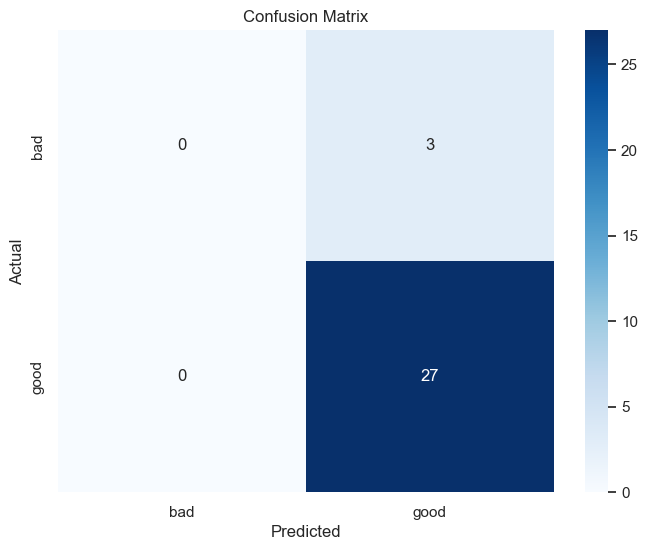

,precision,recall,f1-score,support
bad,0.00,0.0,0.000000,3.0
good,0.90,1.0,0.947368,27.0
accuracy,0.90,0.9,0.900000,0.9
macro avg,0.45,0.5,0.473684,30.0
weighted avg,0.81,0.9,0.852632,30.0


In [188]:
# Define a function to convert ratings into 'good' and 'bad'
def binary_rating(rating):
    if rating >= 4:
        return 'good'
    else:
        return 'bad'

# Apply the function to the 'review_rating' column
binary_data = clean_data.copy()
binary_data['review_rating'] = binary_data['review_rating'].apply(binary_rating)

# Split data into features (X) and target label (y)
X_binary = binary_data['review_comment']
y_binary = binary_data['review_rating']

# Split the data into training and testing sets
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(
    X_binary, y_binary, test_size=0.2, random_state=42)

# Train the model with the binary training data
text_clf_binary = make_pipeline(vectorizer, model)
text_clf_binary.fit(X_train_binary, y_train_binary)

# Predict the categories of the binary test data
y_pred_binary = text_clf_binary.predict(X_test_binary)

# Calculate the classification report for the binary data
report_binary = classification_report(y_test_binary, y_pred_binary, output_dict=True)

# Calculate the confusion matrix for the binary data
conf_matrix_binary = confusion_matrix(y_test_binary, y_pred_binary)

# Convert classification report to DataFrame for better visualization
report_binary_df = pd.DataFrame(report_binary).transpose()

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_binary, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['bad', 'good'], yticklabels=['bad', 'good'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

report_binary_df

In [189]:
# Separate the majority and minority classes
df_majority_binary = binary_data[binary_data.review_rating == 'good']
df_minority_binary = binary_data[binary_data.review_rating == 'bad']

# Oversample minority class
df_minority_upsampled_binary = resample(df_minority_binary, 
                                        replace=True,     # sample with replacement
                                        n_samples=len(df_majority_binary),    # to match majority class
                                        random_state=42) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled_binary = pd.concat([df_majority_binary, df_minority_upsampled_binary])

# Display new class counts
df_upsampled_binary.review_rating.value_counts()

review_rating
good    137
bad     137
Name: count, dtype: int64

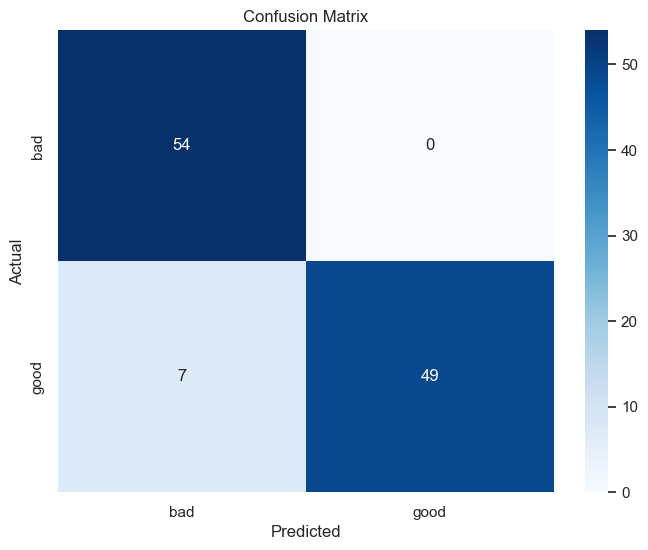

,precision,recall,f1-score,support
bad,0.885246,1.000000,0.939130,54.000000
good,1.000000,0.875000,0.933333,56.000000
accuracy,0.936364,0.936364,0.936364,0.936364
macro avg,0.942623,0.937500,0.936232,110.000000
weighted avg,0.943666,0.936364,0.936179,110.000000


In [211]:
# Split the upsampled binary data into features (X) and target label (y)
X_upsampled_binary = df_upsampled_binary['review_comment']
y_upsampled_binary = df_upsampled_binary['review_rating']

# Split the upsampled data into training and testing sets
X_train_upsampled_binary, X_test_upsampled_binary, y_train_upsampled_binary, y_test_upsampled_binary = train_test_split(
    X_upsampled_binary, y_upsampled_binary, test_size=0.4, random_state=42)

# Train the model with the upsampled binary training data
text_clf_upsampled_binary = make_pipeline(vectorizer, model)
text_clf_upsampled_binary.fit(X_train_upsampled_binary, y_train_upsampled_binary)

# Predict the categories of the upsampled binary test data
y_pred_upsampled_binary = text_clf_upsampled_binary.predict(X_test_upsampled_binary)

# Calculate the classification report for the upsampled binary data
report_upsampled_binary = classification_report(y_test_upsampled_binary, y_pred_upsampled_binary, output_dict=True)

# Calculate the confusion matrix for the upsampled binary data
conf_matrix_upsampled_binary = confusion_matrix(y_test_upsampled_binary, y_pred_upsampled_binary)

# Convert classification report to DataFrame for better visualization
report_upsampled_binary_df = pd.DataFrame(report_upsampled_binary).transpose()

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_upsampled_binary, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['bad', 'good'], yticklabels=['bad', 'good'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

report_upsampled_binary_df


In [212]:
df_upsampled_binary.head()

,course_name,lecture_name,review_rating,review_comment,comment_length
0,Advanced Microsoft Excel,F1 to F12 - Using Excel's Function Keys,good,perfect,8
4,Building a 3-Statement Model in Excel,Calculating Cash Flows and Completing the Mode...,good,great course ned has a talent for explaining t...,75
5,Convolutional Neural Networks with TensorFlow ...,Dimensions,good,its really easy to follow and useful,40
6,Convolutional Neural Networks with TensorFlow ...,Data augmentation,good,excellent very easy and simple explanations,45
7,Corporate Strategy,SWOT analysis in practice - analyzing Starbucks,good,excellent exceeded my expectations,36
